In [1]:
from bs4 import BeautifulSoup
import requests
from requests import get
import pandas as pd
import numpy as np


url_list= ['https://www.boxofficemojo.com/chart/top_lifetime_gross/?ref_=bo_lnav_hm_shrt',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=400',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=600',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=800']

def getmovielinks(url_list):
    movie_links=[]
    for url in url_list:
        response=requests.get(url)
        soup_movie=BeautifulSoup(response.text, 'lxml')
        #grab movie links
        for x in soup_movie.find_all('a', class_='a-link-normal'):
            movie_links.append(x.get('href')) 
    
    return movie_links

movielinks=getmovielinks(url_list)

In [2]:
movielinks

['/?ref_=bo_nb_cso_mojologo',
 'https://pro.imdb.com/login/ap?u=%2Flogin%2Flwa&imdbPageAction=signUp&ref_=mojo_nb_cso_rollover&rf=mojo_nb_cso_rollover',
 'https://www.facebook.com/BoxOfficeMojo/',
 'https://twitter.com/boxofficemojo',
 '/date/?ref_=bo_nb_cso_tab',
 '/intl/?ref_=bo_nb_cso_tab',
 '/year/world/?ref_=bo_nb_cso_tab',
 '/calendar/?ref_=bo_nb_cso_tab',
 '/charts/overall/?ref_=bo_nb_cso_tab',
 '/showdown/?ref_=bo_nb_cso_tab',
 '/brand/?ref_=bo_nb_cso_tab',
 '/charts/overall/?ref_=bo_nb_cso_secondarytab',
 '/charts/weekend/?ref_=bo_nb_cso_secondarytab',
 '/charts/daily/?ref_=bo_nb_cso_secondarytab',
 '/charts/misc/?ref_=bo_nb_cso_secondarytab',
 '/title/tt2488496/?ref_=bo_cso_table_1',
 '/year/2015/?ref_=bo_cso_table_1',
 '/title/tt4154796/?ref_=bo_cso_table_2',
 '/year/2019/?ref_=bo_cso_table_2',
 '/title/tt0499549/?ref_=bo_cso_table_3',
 '/year/2009/?ref_=bo_cso_table_3',
 '/title/tt1825683/?ref_=bo_cso_table_4',
 '/year/2018/?ref_=bo_cso_table_4',
 '/title/tt4154756/?ref_=bo

In [3]:
movie_urls=[]
def mojomovies(movielinks):
    for link in movielinks:
        if "title" in link:
            final='https://www.boxofficemojo.com'+link
            movie_urls.append(final)
            
    return movie_urls

In [4]:
movie_num=mojomovies(movielinks)

In [5]:
movie_num

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/?ref_=bo_cso_table_8',
 'https://www.boxofficemojo.com/title/tt2527336/?ref_=bo_cso_table_9',
 'https://www.boxofficemojo.com/title/tt3606756/?ref_=bo_cso_table_10',
 'https://www.boxofficemojo.com/title/tt6105098/?ref_=bo_cso_table_11',
 'https://www.boxofficemojo.com/title/tt0468569/?ref_=bo_cso_table_12',
 'https://www.boxofficemojo.com/title/tt3748528/?ref_=bo_cso_table_13',
 'https://www.boxofficemojo.com/title/tt2527338/?ref_=bo_cso_table_14',
 

In [8]:
#getting data from pages and saving into dataframe 
import random

def movie_info(movie_num): 
    Titles=[]
    Domestic_Gr=[]
    Inter_Gr=[]
    World_Gr=[]
    Dom_Open=[]
    Budget=[]
    Rel_Date=[]
    Runtime=[]
    Genre=[]
    Rating=[]
    
    #loop through each page  
    for i in movie_num:       
        response = requests.get(i)
        
        
        #saving imported text as variable
        page = response.text

        #parser
        soup = BeautifulSoup(page, "lxml")
    
    
        #GET TITLE FROM EACH PAGE
        try:  
            title=soup.find('h1', class_='a-size-extra-large').text
            Titles.append(title)
        except Exception as error:
            Titles.append(np.nan) 
            
        #GET DOMESTIC GROSS              
        try:
            domestic_gross=soup.find('span', class_='a-size-medium a-text-bold').text.split()[0]
            Domestic_Gr.append(domestic_gross)
        except Exception as error:
            Domestic_Gr.append(np.nan)

        #GET INTERNATIONAL GROSS
        try:
            int_gross=soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            Inter_Gr.append(int_gross)
        except Exception as error:
            Inter_Gr.append(np.nan)
    
        #WORLDWIDE GROSS
        try: 
            worldwide = soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            World_Gr.append(worldwide)
        except Exception as error:
            World_Gr.append(np.nan)
            
        #DOMESTIC OPENING
        try:
            domestic_open = soup.find('span', text = 'Domestic Opening').find_next('span', class_='money').text
            Dom_Open.append(domestic_open)
        except Exception as error:
            Dom_Open.append(np.nan)

        #BUDGET
        try:
            budget = soup.find('span', text = 'Budget').find_next('span', class_='money').text
            Budget.append(budget)
        except Exception as error:
            Budget.append(np.nan)
            
        #RELEASE DATE
        try:
            release_date=soup.find('span', text = 'Earliest Release Date').find_next('span').text
            Rel_Date.append(release_date)
        except Exception as error:
            Rel_Date.append(np.nan)
            
        #RUNTIME
        try:
            runtime=soup.find('span', text = 'Running Time').find_next('span').text
            Runtime.append(runtime)
        except Exception as error:
            Runtime.append(np.nan)
                  
        #GENRE
        try:
            genre=soup.find('span', text = 'Genres').find_next('span').text
            Genre.append(genre)
        except Exception as error:
            Genre.append(np.nan)
              
        #RATING
        try: 
            rating=soup.find('span', text = 'MPAA').find_next('span').text
            Rating.append(rating)
        except Exception as error:
            Rating.append(np.nan)

        
    movies_dict={'Title':Titles,'Domestic_Gr':Domestic_Gr, 'Inter_Gr':Inter_Gr,'World_Gr':World_Gr, 
             'Dom_Open':Dom_Open, 'Budget':Budget,'Rel_Date':Rel_Date, 'Runtime':Runtime, 
             'Genre':Genre,'Rating':Rating}
        
    movies_data=pd.DataFrame(movies_dict)
    
    return movies_data

In [9]:
df2=movie_info(movie_num)


In [10]:
df2.to_csv('Linear_Regression.csv')

In [11]:
df=pd.read_csv('Linear_Regression.csv')

In [12]:
df=df.drop(['Unnamed: 0'], axis=1 )

In [13]:
df.columns

Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Dom_Open', 'Budget',
       'Rel_Date', 'Runtime', 'Genre', 'Rating'],
      dtype='object')

In [14]:
df.rename(columns={'Domestic_Gr': 'Dom_Gross_mil', 'Inter_Gr': 'Int_Gross_mil', 'World_Gr': 'Worldwide_mil', 'Dom_Open': 'Opening_mil', 'Budget':'Budget_mil'}, inplace=True)

#fill NaN with zeros
df=df.fillna(0)

#remove commas and dollar signs from monetary columns
df[df.columns[1:6]] = df[df.columns[1:6]].replace('[\$,]', '', regex=True).astype(float)

In [15]:
df['Dom_Gross_mil'] = df['Dom_Gross_mil'].apply(lambda x: x/1000000)
df['Int_Gross_mil'] = df['Int_Gross_mil'].apply(lambda x: x/1000000)
df['Worldwide_mil'] = df['Worldwide_mil'].apply(lambda x: x/1000000)
df['Opening_mil'] = df['Opening_mil'].apply(lambda x: x/1000000)
df['Budget_mil'] = df['Budget_mil'].apply(lambda x: x/1000000)

In [16]:
df.shape

(1000, 10)

In [17]:
df.set_index('Title', inplace = True)

In [18]:
df.loc[:, 'Rel_Month'] = df.Rel_Date.map(lambda x: x.split()[0])


In [19]:
df.loc[:, 'Profit']=df['Dom_Gross_mil']-df['Opening_mil']


In [20]:
df.tail()


,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit
Title,,,,,,,,,,,
Nacho Libre (2006),80.197993,19.057467,99.255460,28.309599,35.0,"June 16, 2006\n (Domestic)",1 hr 32 min,Comedy\n \n Family\n \n Sport,PG,June,51.888394
Jumper (2008),80.172128,144.959985,225.132113,27.354808,85.0,"February 13, 2008\n (6 markets)",1 hr 28 min,Action\n \n Adventure\n \n ...,PG-13,February,52.817320
Goosebumps (2015),80.080379,78.181045,158.261424,23.618556,58.0,"October 14, 2015\n (Malaysia)",1 hr 43 min,Adventure\n \n Comedy\n \n ...,PG,October,56.461823
Jack Reacher (2012),80.070736,138.269859,218.340595,15.210156,60.0,"December 20, 2012\n (EMEA, APAC)",2 hr 10 min,Action\n \n Thriller,PG-13,December,64.860580
Cloverfield (2008),80.048433,92.345747,172.394180,40.058229,25.0,"January 17, 2008\n (APAC)",1 hr 25 min,Action\n \n Horror\n \n Sc...,PG-13,January,39.990204


In [21]:
df=df[df.Profit != 0.0]
df=df[df.Budget_mil != 0.0]
df=df[df.Dom_Gross_mil != 0.0]
df=df[df.Int_Gross_mil != 0.0]
df=df[df.Opening_mil != 0.0]

In [22]:
df.shape


(811, 11)

In [23]:
df.tail()


,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit
Title,,,,,,,,,,,
Nacho Libre (2006),80.197993,19.057467,99.255460,28.309599,35.0,"June 16, 2006\n (Domestic)",1 hr 32 min,Comedy\n \n Family\n \n Sport,PG,June,51.888394
Jumper (2008),80.172128,144.959985,225.132113,27.354808,85.0,"February 13, 2008\n (6 markets)",1 hr 28 min,Action\n \n Adventure\n \n ...,PG-13,February,52.817320
Goosebumps (2015),80.080379,78.181045,158.261424,23.618556,58.0,"October 14, 2015\n (Malaysia)",1 hr 43 min,Adventure\n \n Comedy\n \n ...,PG,October,56.461823
Jack Reacher (2012),80.070736,138.269859,218.340595,15.210156,60.0,"December 20, 2012\n (EMEA, APAC)",2 hr 10 min,Action\n \n Thriller,PG-13,December,64.860580
Cloverfield (2008),80.048433,92.345747,172.394180,40.058229,25.0,"January 17, 2008\n (APAC)",1 hr 25 min,Action\n \n Horror\n \n Sc...,PG-13,January,39.990204


In [24]:
##EXPLORATORY DATA ANALYSIS
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline

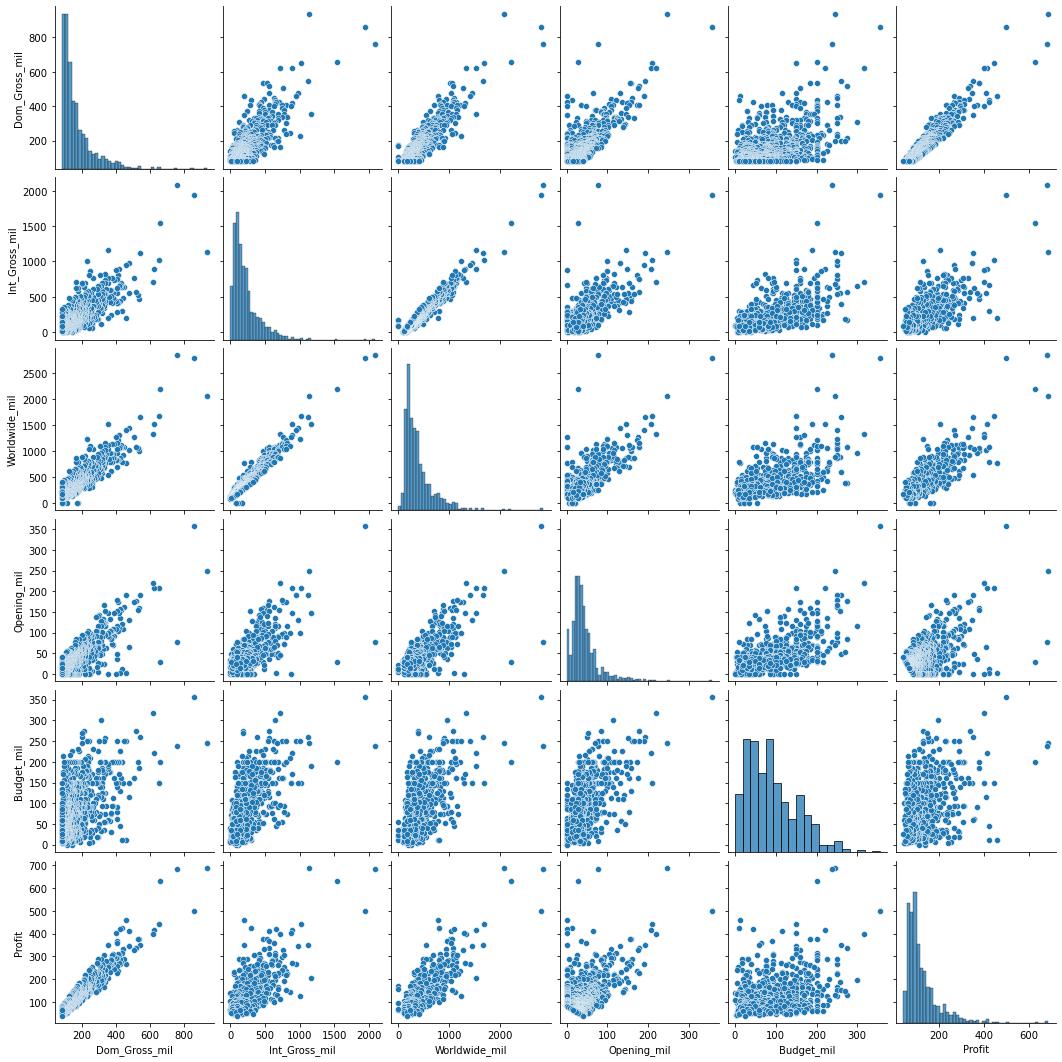

In [25]:
sns.pairplot(df);



In [26]:
df.corr()


,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Profit
Dom_Gross_mil,1.000000,0.793032,0.900480,0.767446,0.482156,0.955600
Int_Gross_mil,0.793032,1.000000,0.975588,0.693943,0.632445,0.718600
Worldwide_mil,0.900480,0.975588,1.000000,0.751764,0.612930,0.832602
Opening_mil,0.767446,0.693943,0.751764,1.000000,0.617683,0.544456
Budget_mil,0.482156,0.632445,0.612930,0.617683,1.000000,0.346922
Profit,0.955600,0.718600,0.832602,0.544456,0.346922,1.000000


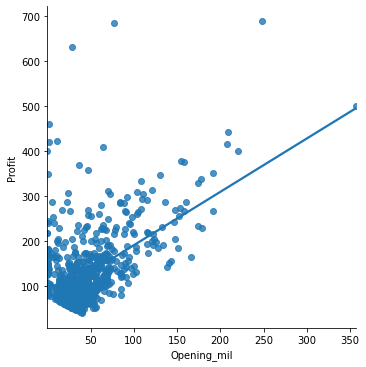

In [27]:
sns.lmplot(x ="Opening_mil", y ="Profit", data = df, order = 1, ci = None)


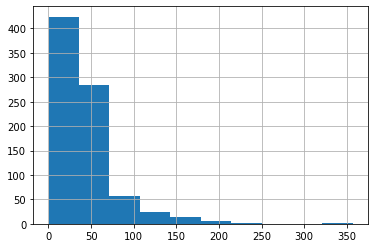

In [28]:
#histogram of opening data
#has positive skew
df.Opening_mil.hist();

array([[<AxesSubplot:title={'center':'log_opening'}>]], dtype=object)

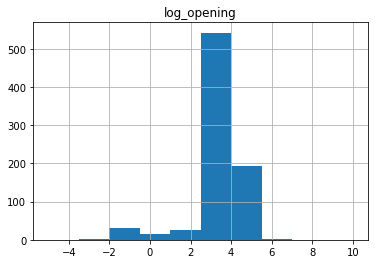

In [29]:
#log transformation of opening_mil
df['log_opening'] = np.log(df['Opening_mil'])

df.hist('log_opening',range=[-5, 10])

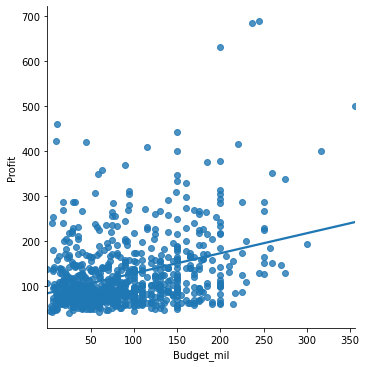

In [30]:
sns.lmplot(x ="Budget_mil", y ="Profit", data = df, order = 1, ci = None)


array([[<AxesSubplot:title={'center':'log_budget'}>]], dtype=object)

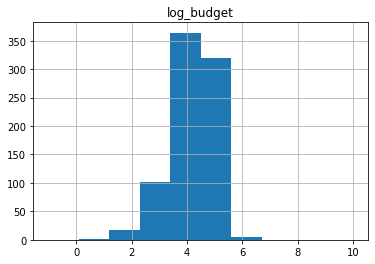

In [31]:
#log transformation of budget
df['log_budget'] = np.log(df['Budget_mil'])

df.hist('log_budget',range=[-1, 10])

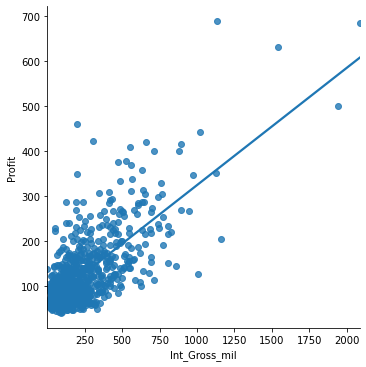

In [32]:
sns.lmplot(x ="Int_Gross_mil", y ="Profit", data = df, order = 1, ci = None)


In [33]:
#add to dataframe
df['log_profit'] = np.log(df['Profit'])

In [34]:
df.tail()


,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit,log_opening,log_budget,log_profit
Title,,,,,,,,,,,,,,
Nacho Libre (2006),80.197993,19.057467,99.255460,28.309599,35.0,"June 16, 2006\n (Domestic)",1 hr 32 min,Comedy\n \n Family\n \n Sport,PG,June,51.888394,3.343201,3.555348,3.949095
Jumper (2008),80.172128,144.959985,225.132113,27.354808,85.0,"February 13, 2008\n (6 markets)",1 hr 28 min,Action\n \n Adventure\n \n ...,PG-13,February,52.817320,3.308892,4.442651,3.966839
Goosebumps (2015),80.080379,78.181045,158.261424,23.618556,58.0,"October 14, 2015\n (Malaysia)",1 hr 43 min,Adventure\n \n Comedy\n \n ...,PG,October,56.461823,3.162033,4.060443,4.033565
Jack Reacher (2012),80.070736,138.269859,218.340595,15.210156,60.0,"December 20, 2012\n (EMEA, APAC)",2 hr 10 min,Action\n \n Thriller,PG-13,December,64.860580,2.721963,4.094345,4.172240
Cloverfield (2008),80.048433,92.345747,172.394180,40.058229,25.0,"January 17, 2008\n (APAC)",1 hr 25 min,Action\n \n Horror\n \n Sc...,PG-13,January,39.990204,3.690334,3.218876,3.688635


In [35]:
#save final dataframe as csv
df.to_csv('Project_Linear_Regression.csv')